In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data1 = pd.read_pickle(r'data\subject101.pkl')
data2 = pd.read_pickle(r'data\subject102.pkl')


In [3]:
vals = ['standing', 'walking','running','cycling']
data1 = data1.loc[data1['activity'].isin(vals)].copy()
data2 = data2.loc[data2['activity'].isin(vals)].copy()

In [4]:
data1.drop(data1[data1.activity=='running'].iloc[:1000].index, inplace=True)
data1.drop(data1[data1.activity=='running'].iloc[-1000:].index, inplace=True)
data1.drop(data1[data1.activity=='walking'].iloc[:1000].index, inplace=True)
data1.drop(data1[data1.activity=='walking'].iloc[-1000:].index, inplace=True)
data1.drop(data1[data1.activity=='cycling'].iloc[:1000].index, inplace=True)
data1.drop(data1[data1.activity=='cycling'].iloc[-1000:].index, inplace=True)
data1.drop(data1[data1.activity=='standing'].iloc[:1000].index, inplace=True)
data1.drop(data1[data1.activity=='standing'].iloc[-1000:].index, inplace=True)

In [5]:
data2.drop(data2[data2.activity=='running'].iloc[:1000].index, inplace=True)
data2.drop(data2[data2.activity=='running'].iloc[-1000:].index, inplace=True)
data2.drop(data2[data2.activity=='walking'].iloc[:1000].index, inplace=True)
data2.drop(data2[data2.activity=='walking'].iloc[-1000:].index, inplace=True)
data2.drop(data2[data2.activity=='cycling'].iloc[:1000].index, inplace=True)
data2.drop(data2[data2.activity=='cycling'].iloc[-1000:].index, inplace=True)
data2.drop(data2[data2.activity=='standing'].iloc[:1000].index, inplace=True)
data2.drop(data2[data2.activity=='standing'].iloc[-1000:].index, inplace=True)

In [6]:
data1.activityID.value_counts()

6    21492
3    19593
4    19383
5    18684
Name: activityID, dtype: int64

In [7]:
def absacc(row):
    return np.sqrt(row['IMU_chest_ax1']**2 + row['IMU_chest_ay1']**2 + row['IMU_chest_az1']**2)/9.806

In [8]:
data1['absacc'] = data1.apply(absacc, axis=1)
data2['absacc'] = data2.apply(absacc, axis=1)



<IPython.core.display.Javascript object>


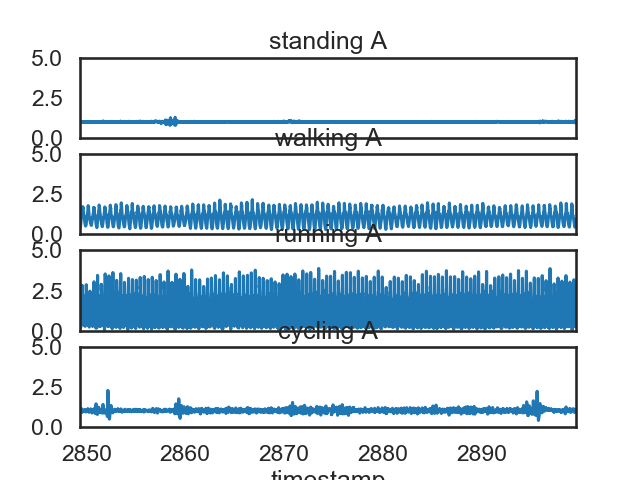

C:\Users\meesh\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


In [9]:
# Let's take a look
fig, ax = plt.subplots(4)
data1.absacc[data1.activityID==3].iloc[0:5000].plot(ax=ax[0],ylim=(0,5)); ax[0].set_title('standing A'); 
#data2.absacc[data2.activityID==3].plot(ax=ax[1]); ax[1].set_title('standing B');
data1.absacc[data1.activityID==4].iloc[0:5000].plot(ax=ax[1],ylim=(0,5)); ax[1].set_title('walking A'); 
#data2.absacc[data2.activityID==4].plot(ax=ax[3]); ax[3].set_title('walking B');
data1.absacc[data1.activityID==5].iloc[0:5000].plot(ax=ax[2],ylim=(0,5)); ax[2].set_title('running A');
data1.absacc[data1.activityID==6].iloc[0:5000].plot(ax=ax[3],ylim=(0,5)); ax[3].set_title('cycling A');
plt.tight_layout()

plt.savefig(r'images\acc_sub_a.png')

<IPython.core.display.Javascript object>


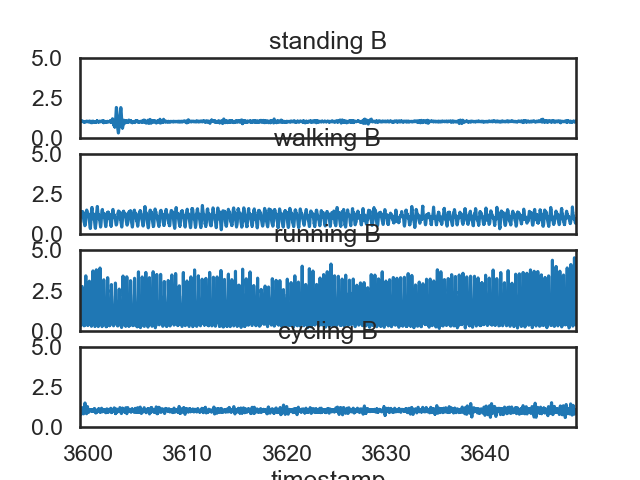

C:\Users\meesh\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


In [10]:
fig, ax = plt.subplots(4)

data2.absacc[data2.activityID==3].iloc[100:5000].plot(ax=ax[0],ylim=(0,5)); ax[0].set_title('standing B'); 
data2.absacc[data2.activityID==4].iloc[100:5000].plot(ax=ax[1],ylim=(0,5)); ax[1].set_title('walking B'); 
data2.absacc[data2.activityID==5].iloc[100:5000].plot(ax=ax[2],ylim=(0,5)); ax[2].set_title('running B');
data2.absacc[data2.activityID==6].iloc[100:5000].plot(ax=ax[3],ylim=(0,5)); ax[3].set_title('cycling B');
plt.tight_layout()
plt.savefig(r'images\acc_sub_b.png')

<IPython.core.display.Javascript object>


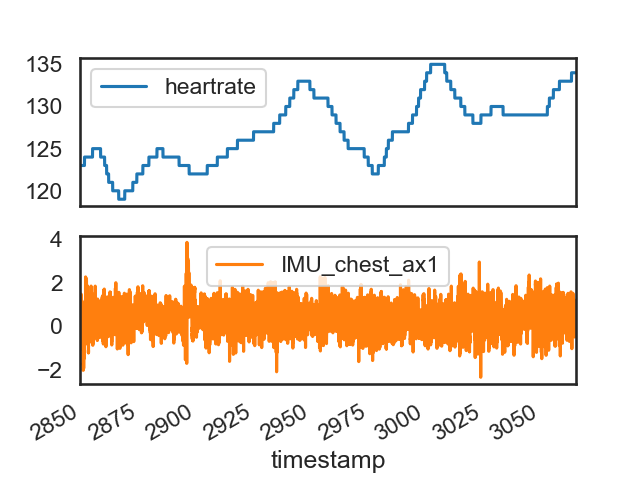

<IPython.core.display.Javascript object>


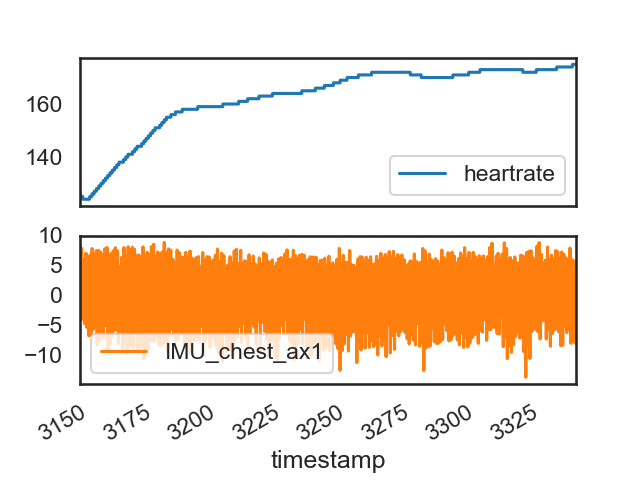

<IPython.core.display.Javascript object>


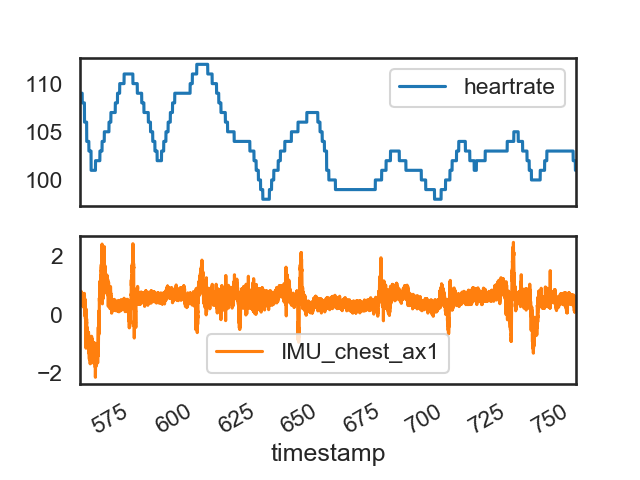

<IPython.core.display.Javascript object>


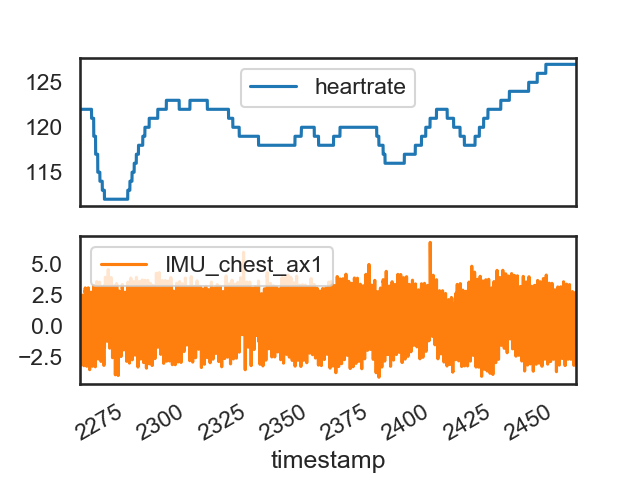

activity
cycling     [AxesSubplot(0.125,0.570909;0.775x0.309091), A...
running     [AxesSubplot(0.125,0.570909;0.775x0.309091), A...
standing    [AxesSubplot(0.125,0.570909;0.775x0.309091), A...
walking     [AxesSubplot(0.125,0.570909;0.775x0.309091), A...
dtype: object

In [11]:
feats = ['heartrate','IMU_chest_ax1','activity']
dt = data1[feats]
dac = dt.groupby('activity')

dac.plot(subplots=True, legend=True)

<IPython.core.display.Javascript object>


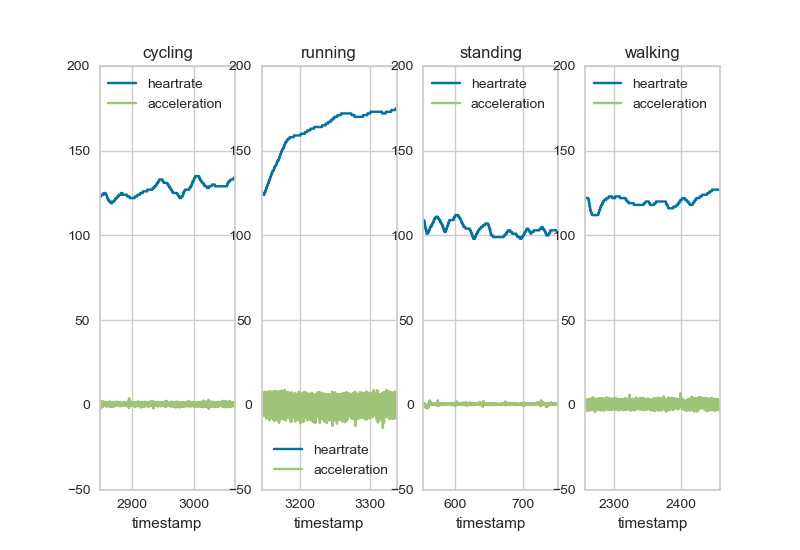

In [24]:
plt.figure()

# Iterate through continents

for i, (ac_name, ac_gdf) in enumerate(dac):
    # create subplot axes in a 3x3 grid
    ax = plt.subplot(1,4, i + 1) # nrows, ncols, axes position
    # plot the activity on these axes
    ac_gdf.plot(ax=ax, ylim=(-50,200))
    # set the title
    ax.set_title(ac_name)
    ax.legend(["heartrate", "acceleration"])
    # set the aspect
    # adjustable datalim ensure that the plots have the same axes size
    #ax.set_aspect('equal', adjustable='datalim')


plt.show()
plt.savefig(r'images\act_comp.png')

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

from yellowbrick.features.importances import FeatureImportances

In [14]:


# Create a new matplotlib figure
#fig = plt.figure()
#ax = fig.add_subplot()

#viz = FeatureImportances(GradientBoostingClassifier(), ax=ax)
#viz.fit(dt, data1.activity)
#viz.poof()

In [15]:
import pickle
# Load data (deserialize)
with open(r'data\2featclass.pickle', 'rb') as handle:
    dict_2class = pickle.load(handle)

In [16]:
et_y_true = dict_2class['Extra Trees']['y_true']
et_y_pred = dict_2class['Extra Trees']['y_pred']

In [17]:
def cm_vizu(y_pred,y_true,data,plt_title):
    cm = confusion_matrix(y_pred, y_true, labels=data.activity.unique())
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(5,4))
    sns.heatmap(cm_normalized, annot=True, fmt=".4f",
                cmap='Blues', square=True,
                xticklabels=data.activity.unique(),
                yticklabels=data.activity.unique())
    ax.set_xlabel('Predicted Activity')
    ax.set_ylabel('True Activity')
    plt.title(plt_title, fontsize = 15)
    plt.tight_layout()

<IPython.core.display.Javascript object>


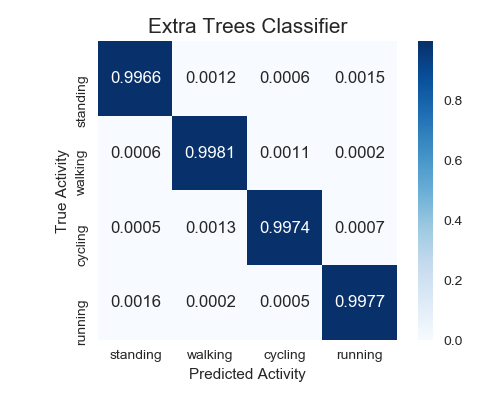

In [18]:
cm_vizu(et_y_true,et_y_pred,data1,'Extra Trees Classifier')
plt.savefig(r'images\et_cm.png')

In [19]:
cr = classification_report(et_y_true,et_y_pred)
print(cr)

              precision    recall  f1-score   support

     cycling       1.00      1.00      1.00     59187
     running       1.00      1.00      1.00     37151
    standing       1.00      1.00      1.00     72015
     walking       1.00      1.00      1.00     87130

   micro avg       1.00      1.00      1.00    255483
   macro avg       1.00      1.00      1.00    255483
weighted avg       1.00      1.00      1.00    255483



In [20]:
cls = [key for key in dict_2class.keys()]
accuracy_score = [dict_2class[key]['accuracy_score'] for key in cls]

<IPython.core.display.Javascript object>


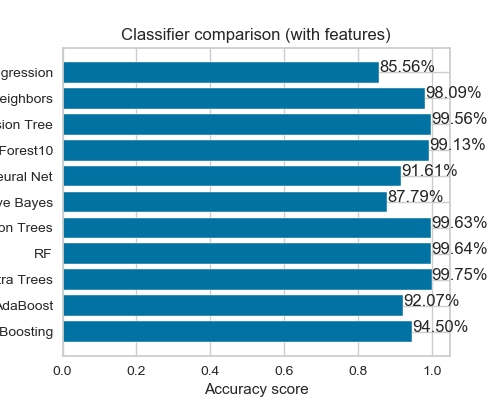

In [21]:
fig, ax = plt.subplots(figsize=(5,4))
y_pos = np.arange(len(cls))
ax.barh(y_pos, accuracy_score, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(cls)
ax.invert_yaxis()  # labels read top-to-bottom
[ax.text(v, i, '{:.2f}%'.format(100*v)) for i, v in enumerate(accuracy_score)];
ax.set_xlabel('Accuracy score')
ax.set_title('Classifier comparison (with features)')
plt.savefig(r'images\classifier_comp.png')